In [2]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 18.7 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
     ---------------------------------------- 1.2/1.2 MB 8.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
     ---------------------------------------- 4.1/4.1 MB 20.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cache

In [5]:
#Importing the Libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import math,time,random,datetime
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf


Data Import

In [7]:
#Importing the Test Dataset
test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [8]:
#Importing the Train Dataset
train = pd.read_csv('UNSW_NB15_training-set.csv')

Exploratory data Anlaysis 

In [9]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [11]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [12]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [13]:
test.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
#Finding the Null values for Train Dataset
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [15]:
#Shape of Train Dataset
train.shape

(82332, 45)

In [16]:
#Finding the Null values for Test Dataset
test.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [17]:
#shape of the Test dataset
test.shape

(175341, 45)

Data Preprocessing

In [18]:
#Removing the index column From Train Dataset
train.drop(['id'], axis=1 ,inplace= True)

In [19]:
#Removing the index Column From Test Dataset
test.drop(['id'], axis=1 , inplace = True)

In [20]:
test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [21]:
train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


Data visualization

<Axes: >

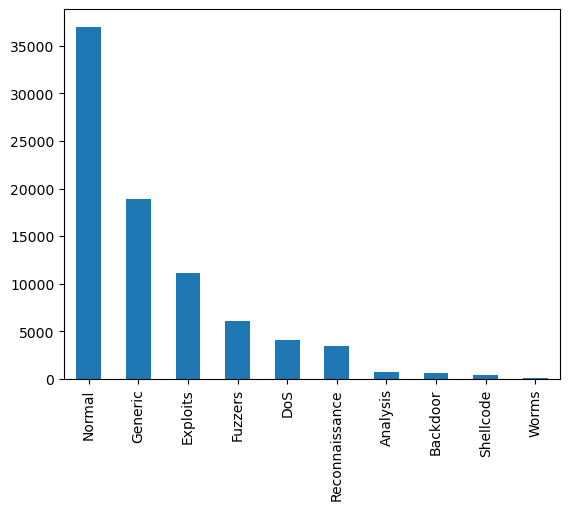

In [22]:
# Graph for Train attacks_cat
train.attack_cat.value_counts().plot.bar()

<Axes: >

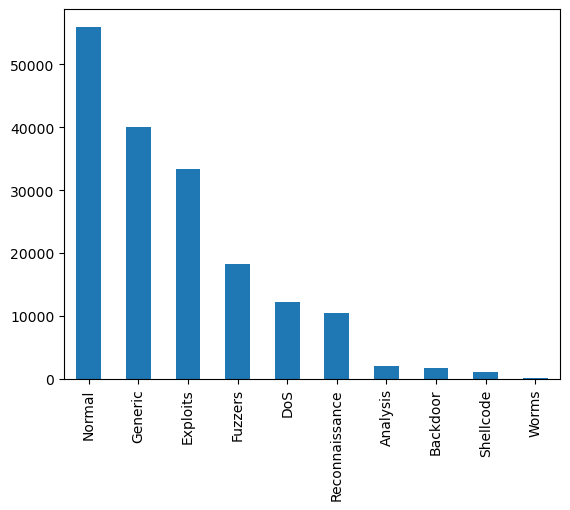

In [23]:
test.attack_cat.value_counts().plot.bar()

In [24]:
# Categorical and numerical columns in the Train and Test DataSet
cols_cat_train = train.select_dtypes('object').columns 
cols_numeric_train= train._get_numeric_data().columns 
Cols_cat_test = test.select_dtypes('object').columns
cols_numeric_test = test._get_numeric_data().columns

In [25]:
#Categorical columns in Train Dataset
cols_cat_train

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [26]:
#Numerical Columns in Train Dataset
cols_numeric_train

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [27]:
#Categorical columns in Test Dataset
Cols_cat_test 

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [28]:
cols_numeric_test 

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

Label Encoder

In [29]:
# converting the Categorical values to numerical values in Train Dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['attack_cat']= le.fit_transform(train['attack_cat'])
train['proto']= le.fit_transform(train['proto'])
train['service']= le.fit_transform(train['service'])
train['state']= le.fit_transform(train['state'])

In [30]:
# converting the Categorical values to numerical values in Test Dataset
le = preprocessing.LabelEncoder()
test['attack_cat']= le.fit_transform(test['attack_cat'])
test['proto']= le.fit_transform(test['proto'])
test['service']= le.fit_transform(test['service'])
test['state']= le.fit_transform(test['state'])

In [31]:
train.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [32]:
test.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [33]:
#Reading the train Dataset
train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,4,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,6,0
1,0.000008,117,0,4,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,6,0
2,0.000005,117,0,4,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,6,0
3,0.000006,117,0,4,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,6,0
4,0.000010,117,0,4,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,0,4,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,6,0
82328,1.106101,111,0,3,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,6,0
82329,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,6,0
82330,0.000000,6,0,4,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,6,0


In [34]:
#Reading the Test dataset
test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,5,1
175337,0.505762,113,0,2,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,8,1
175338,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,5,1
175339,0.000009,119,2,3,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,5,1


<Axes: xlabel='label', ylabel='count'>

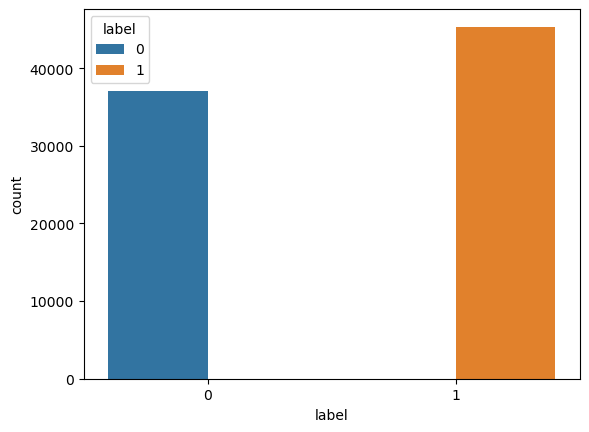

In [35]:
#plotting the output labels in Train dataset
sns.countplot(data = train,x = train['label'],hue = "label")


<Axes: xlabel='label', ylabel='count'>

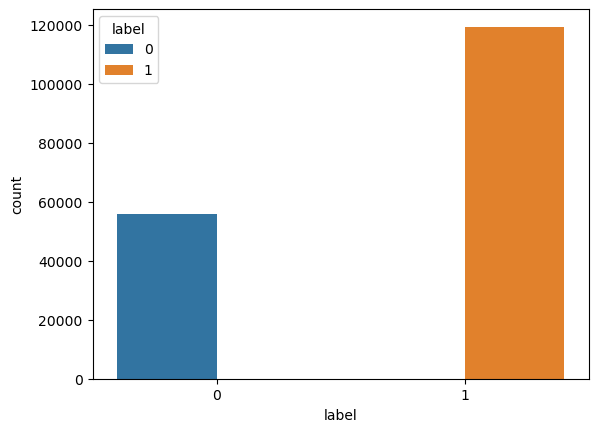

In [36]:
#plotting the output labels in Test dataset
sns.countplot(data = test,x = test['label'],hue = "label")

In [37]:
#Displaying the vlaues in  Train Label 
train['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [38]:
#Displaying the vlaues in  Test Label 
test['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

<Axes: >

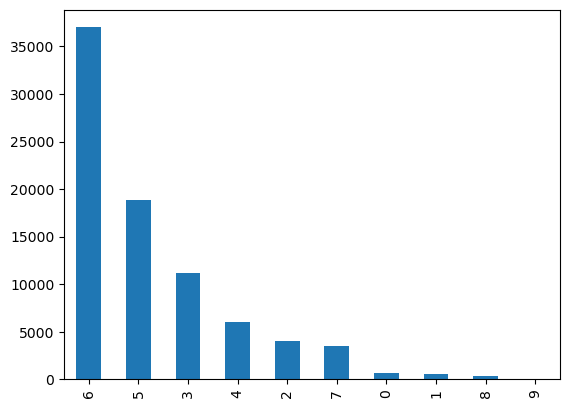

In [39]:
# After converting the Categorical to discrete values,plotting the Train attack_cat values
train.attack_cat.value_counts().plot.bar()

<Axes: >

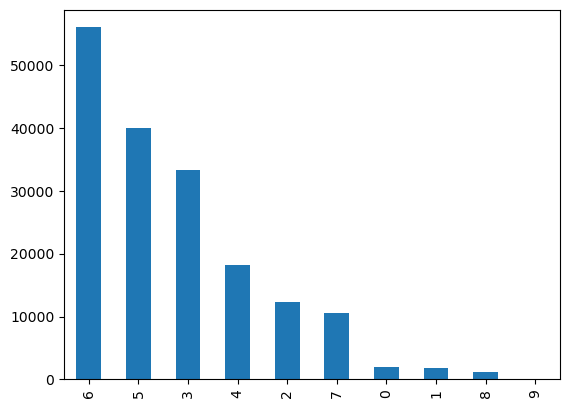

In [40]:
# After converting the Categorical to discrete values,plotting the Test attack_cat values
test.attack_cat.value_counts().plot.bar()

In [41]:
#Assigning the features to Input X and Target Y in Train Dataset
X_train = train.drop('label',axis = 1)
Y_train = train['label']


In [42]:
#Assigning the features to Input X and Target Y in Test Dataset
X_test = test.drop('label',axis = 1)
Y_test = test['label']


In [43]:
# Shapes of each Dataset
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((82332, 43), (82332,), (175341, 43), (175341,))

Normalization


In [44]:
# Normalizing the data using Standard scaler
from sklearn.preprocessing import StandardScaler

In [45]:
#Normalizing the X_Train Dataset
scaler = StandardScaler()
Std = scaler.fit_transform(X_train)
Std

array([[-0.21372745,  0.41056274, -0.6744059 , ..., -0.64419018,
        -0.10607007,  0.70710473],
       [-0.21372808,  0.41056274, -0.6744059 , ..., -0.64419018,
        -0.10607007,  0.70710473],
       [-0.21372872,  0.41056274, -0.6744059 , ..., -0.554273  ,
        -0.10607007,  0.70710473],
       ...,
       [-0.21372978, -5.54527746, -0.6744059 , ..., -0.73410735,
         9.42773017,  0.70710473],
       [-0.21372978, -5.54527746, -0.6744059 , ..., -0.73410735,
         9.42773017,  0.70710473],
       [-0.21372787,  0.41056274, -0.6744059 , ..., -0.73410735,
        -0.10607007,  0.70710473]])

In [46]:
#Normalizing the X_Test Dataset
scaler = StandardScaler()
Std_1 = scaler.fit_transform(X_test)
Std_1

array([[-0.19102881,  0.15180939, -0.70230738, ..., -0.75307402,
        -0.12650796,  0.8480243 ],
       [-0.10948479,  0.15180939, -0.70230738, ..., -0.28825701,
        -0.12650796,  0.8480243 ],
       [ 0.04069922,  0.15180939, -0.70230738, ..., -0.28825701,
        -0.12650796,  0.8480243 ],
       ...,
       [-0.20977336,  0.42023529,  0.16531734, ...,  0.2695234 ,
        -0.12650796,  0.21036411],
       [-0.20977336,  0.42023529,  0.16531734, ...,  1.94286464,
        -0.12650796,  0.21036411],
       [-0.20977336,  0.42023529,  0.16531734, ...,  1.94286464,
        -0.12650796,  0.21036411]])

Feature Selection:PCA

Principal Component Analysis

In [47]:
pca_train = PCA(n_components= 25)
Std_pca = pca_train.fit_transform(Std)


In [48]:
pca_test = PCA(n_components= 25)
Std_pca_test = pca_test.fit_transform(Std_1)

In [49]:
Std_pca.shape,Std_pca_test.shape

((82332, 25), (175341, 25))

Classifications

Decision Tree Classfication

In [50]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
classifier = DecisionTreeClassifier()
classifier.fit(Std_pca,Y_train)
Y_pred = classifier.predict(Std_pca_test)
accuracy_score(Y_test,Y_pred)
end_time = time.time()
dt_time = (end_time - start_time)
print("Execution time: %s" % dt_time)
print(accuracy_score(Y_test,Y_pred))

Execution time: 9.599347829818726
0.7787853382836872


In [51]:
cc = confusion_matrix(Y_test,Y_pred)
cc


array([[38263, 17737],
       [21051, 98290]], dtype=int64)

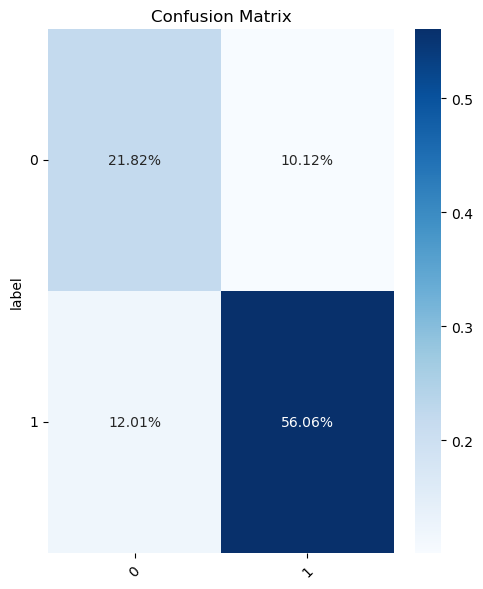

In [52]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(cc/np.sum(cc),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66     56000
           1       0.85      0.82      0.84    119341

    accuracy                           0.78    175341
   macro avg       0.75      0.75      0.75    175341
weighted avg       0.78      0.78      0.78    175341



RandomForestClassification


In [54]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
model = RandomForestClassifier()
model.fit(Std_pca,Y_train)
pred = model.predict(Std_pca_test)
accuracy_score(Y_test,pred)
end_time = time.time()
dt_time = (end_time - start_time)
print("Execution time: %s" % dt_time)
print(accuracy_score(Y_test,pred))

Execution time: 134.61965346336365
0.834003456122641


In [55]:
cf = confusion_matrix(Y_test,pred)
cf

array([[ 43553,  12447],
       [ 16659, 102682]], dtype=int64)

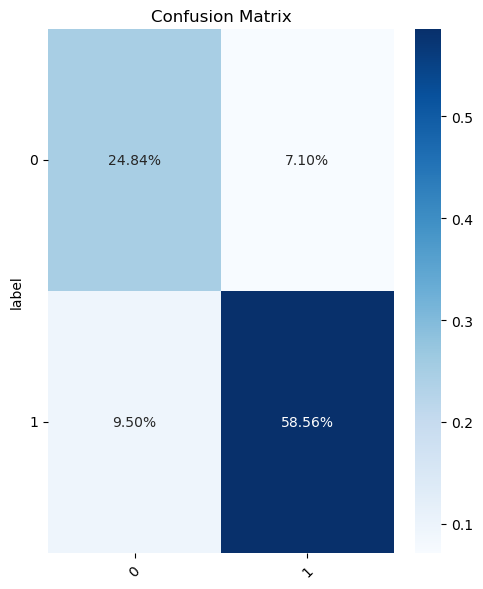

In [56]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(cf/np.sum(cf),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     56000
           1       0.89      0.86      0.88    119341

    accuracy                           0.83    175341
   macro avg       0.81      0.82      0.81    175341
weighted avg       0.84      0.83      0.84    175341



Support Vector Machine

In [58]:
from sklearn import svm
start_time = time.time()
Model_1 =svm.SVC()
Model_1.fit(Std_pca,Y_train)
Prediction = Model_1.predict(Std_pca_test) 
dt_time = (time.time() - start_time)
print("Execution time: %s" % dt_time)
print(accuracy_score(Y_test,Prediction))

Execution time: 625.4336333274841
0.779925972818679


In [59]:
cm = (confusion_matrix(Y_test,Prediction))
cm

array([[41549, 14451],
       [24137, 95204]], dtype=int64)

In [60]:
print(classification_report(Y_test,Prediction))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     56000
           1       0.87      0.80      0.83    119341

    accuracy                           0.78    175341
   macro avg       0.75      0.77      0.76    175341
weighted avg       0.79      0.78      0.78    175341



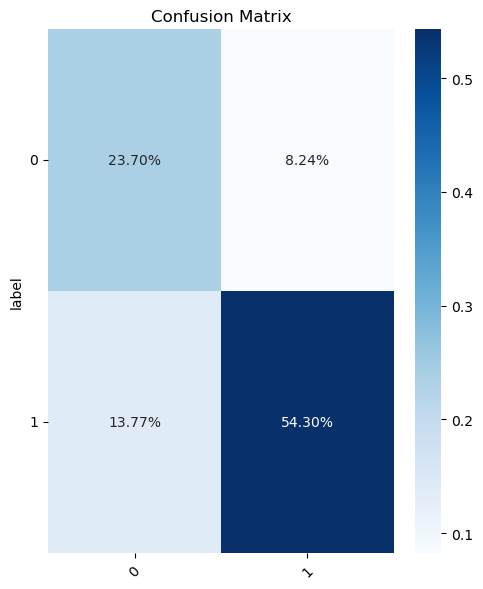

In [61]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

XGBoost Classifier

In [62]:
from xgboost import XGBClassifier
start_time = time.time()
model_1= XGBClassifier()
model_1.fit(Std_pca, Y_train)
prediction = model_1.predict(Std_pca_test)
end_time = time.time()
dt_time = (end_time - start_time)
print("Execution time: %s" % dt_time)
print("Accuracy:",accuracy_score(Y_test,prediction))
print(classification_report(Y_test,prediction))

Execution time: 20.343493938446045
Accuracy: 0.8341688481302149
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     56000
           1       0.91      0.84      0.87    119341

    accuracy                           0.83    175341
   macro avg       0.81      0.83      0.82    175341
weighted avg       0.85      0.83      0.84    175341



In [63]:
CF = confusion_matrix(Y_test,prediction)
CF

array([[46415,  9585],
       [19492, 99849]], dtype=int64)

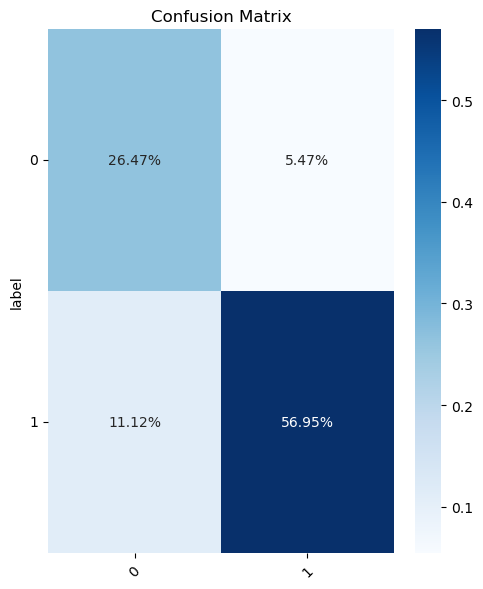

In [64]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(CF/np.sum(CF),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Naive BayesClassifier

In [65]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time() 
classifier = GaussianNB()  
classifier.fit(Std_pca, Y_train) 
y_pred = classifier.predict(Std_pca_test)
end_time = time.time()
dt_time = (end_time - start_time)
print("Execution time: %s" % dt_time)
print("Accuracy:",accuracy_score(Y_test,y_pred))

Execution time: 0.33884096145629883
Accuracy: 0.7482619581273062


In [66]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62     56000
           1       0.83      0.80      0.81    119341

    accuracy                           0.75    175341
   macro avg       0.71      0.72      0.72    175341
weighted avg       0.75      0.75      0.75    175341



In [67]:
cf_1 = confusion_matrix(Y_test,y_pred)
cf_1

array([[36112, 19888],
       [24252, 95089]], dtype=int64)

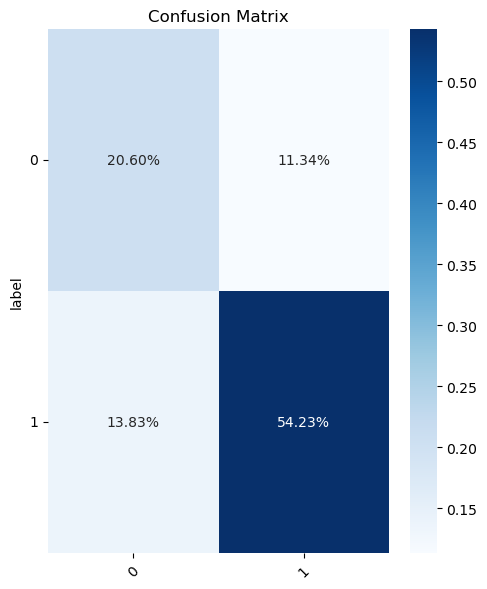

In [68]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(cf_1/np.sum(cf_1),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Artifical Neural Network(ANN)

In [69]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [70]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu",input_dim =25))

In [71]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [72]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [73]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [74]:
#Fitting ANN
ann.fit(Std_pca,Y_train,epochs = 10)

Epoch 1/10
2573/2573 [==============================] - 9s 3ms/step - loss: 0.1856 - accuracy: 0.9257
Epoch 2/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 3/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0190 - accuracy: 0.9967
Epoch 4/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0121 - accuracy: 0.9979
Epoch 5/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0079 - accuracy: 0.9986
Epoch 6/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0053 - accuracy: 0.9989
Epoch 7/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 8/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0052 - accuracy: 0.9993
Epoch 9/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.0046 - accuracy: 0.9993
Epoch 10/10
2573/2573 [==============================] - 7s 3ms/step - loss: 0.002

In [75]:
ann.evaluate(Std_pca_test,Y_test)

5480/5480 [==============================] - 12s 2ms/step - loss: 2.6841 - accuracy: 0.8035


[2.684140205383301, 0.8035485148429871]

In [76]:
pd = ann.predict(Std_pca_test)
pd

5480/5480 [==============================] - 10s 2ms/step


array([[4.1711741e-05],
       [9.8430175e-01],
       [9.9977112e-01],
       ...,
       [9.5045668e-01],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [77]:
y_Pred = []
for i in pd:
  if i  > 0.5:
    y_Pred.append(1)
  else:
    y_Pred.append(0)  

In [78]:
print(classification_report(Y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71     56000
           1       0.88      0.82      0.85    119341

    accuracy                           0.80    175341
   macro avg       0.77      0.79      0.78    175341
weighted avg       0.81      0.80      0.81    175341



In [79]:
CF_1 = confusion_matrix(Y_test,y_Pred)
CF_1

array([[42923, 13077],
       [21369, 97972]], dtype=int64)

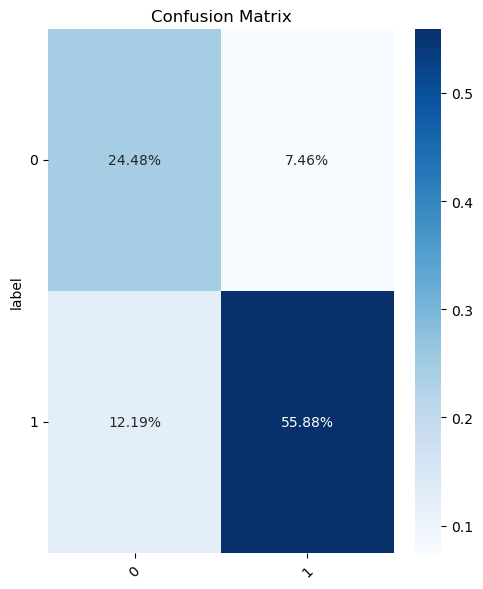

In [80]:
plt.figure(figsize=(5,6))
ax = sns.heatmap(CF_1/np.sum(CF_1),annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_ylabel('label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()